### Import Libraries for Audio

In [14]:
#pip install pydub

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
from pydub import AudioSegment

### Download Audio File

In [16]:
import urllib.request
f = 'Drone1.wav' # or Drone2.wav, Drone3.wav
url = 'http://apmonitor.com/dde/uploads/Main/'+f
urllib.request.urlretrieve(url,f)

('Drone1.wav', <http.client.HTTPMessage at 0x7fe10a8db9a0>)

### Import Audio File

In [17]:
# Import the .wav audio
# s = sampling (int)
# a = audio signal (numpy array)
s,a = wavfile.read(f)
print('Sampling Rate:',s)
print('Audio Shape:',np.shape(a))

Sampling Rate: 48000
Audio Shape: (387072, 2)


### Display Original Signal

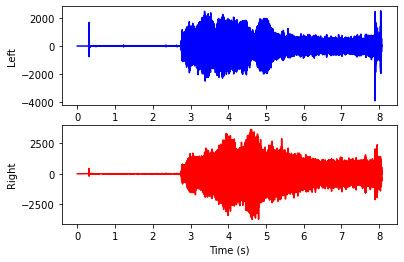

In [18]:
# number of samples
na = a.shape[0]
# audio time duration
la = na / s

# plot signal versus time
t = np.linspace(0,la, na)
plt.subplot(2,1,1)
plt.plot(t,a[:,0],'b-')
plt.ylabel('Left')
plt.subplot(2,1,2)
plt.plot(t,a[:,1],'r-')
plt.ylabel('Right')
plt.xlabel('Time (s)')
plt.show()

### Convert to One Channel (Stereo to Mono)

In [19]:
sound = AudioSegment.from_wav(f)
sound = sound.set_channels(1)
fm = f[:-4]+'_mono.wav'
sound.export(fm,format="wav")

<_io.BufferedRandom name='Drone1_mono.wav'>

### Import Audio File

In [20]:
s,a = wavfile.read(fm)
print('Sampling Rate:',s)
print('Audio Shape:',np.shape(a))

Sampling Rate: 48000
Audio Shape: (387072,)


### Display Modified Audio

/var/folders/5d/lqf7vpxx5fb6cfh_tc7sw8rm0000gn/T/ipykernel_2610/576827099.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(t,a,'k-',color='purple')


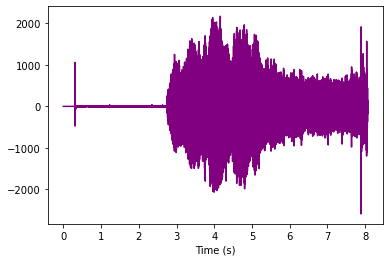

In [21]:
na = a.shape[0]
la = na / s
t = np.linspace(0,la,na)
plt.plot(t,a,'k-',color='purple')
plt.xlabel('Time (s)')
plt.show()

### Frequency Analysis

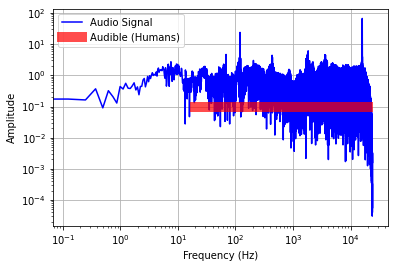

In [22]:
# analyze entire audio clip
na = len(a)
a_k = np.fft.fft(a)[0:int(na/2)]/na # FFT function from numpy
a_k[1:] = 2*a_k[1:] # single-sided spectrum only
Pxx = np.abs(a_k)   # remove imaginary part
f = s*np.arange((na/2))/na # frequency vector

# plotting
fig,ax = plt.subplots()
plt.plot(f,Pxx,'b-',label='Audio Signal')
plt.plot([20,20000],[0.1,0.1],'r-',alpha=0.7,\
         linewidth=10,label='Audible (Humans)')
ax.set_xscale('log'); ax.set_yscale('log')
plt.grid(); plt.legend()
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')
plt.show()

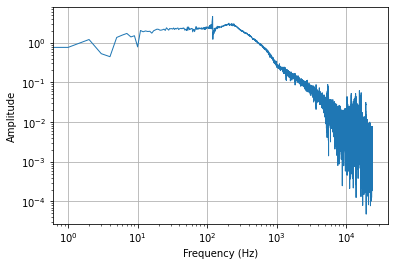

In [23]:
# first second clip
na = s
a_k = np.fft.fft(a[:na])[0:int(na/2)]/na # FFT function from numpy
a_k[1:] = 2*a_k[1:] # single-sided spectrum only
Pxx = np.abs(a_k)   # remove imaginary part
f = s*np.arange((na/2))/na # frequency vector

# plotting
fig,ax = plt.subplots()
plt.plot(f,Pxx,linewidth=1)
ax.set_xscale('log'); ax.set_yscale('log')
plt.ylabel('Amplitude'); plt.grid()
plt.xlabel('Frequency (Hz)')
plt.show()

### Spectrogram

/var/folders/5d/lqf7vpxx5fb6cfh_tc7sw8rm0000gn/T/ipykernel_2610/3138809093.py:2: RuntimeWarning: divide by zero encountered in log
  lspg = np.log(spgram)


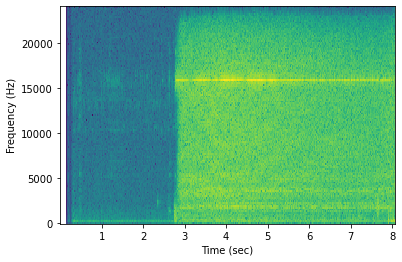

In [24]:
fr, tm, spgram = signal.spectrogram(a,s)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

### Features for Machine Learning

#### Bin the Frequencies

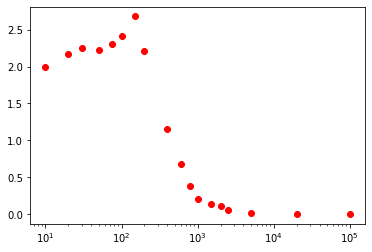

In [25]:
# bin the frequencies for machine learning features
fb = np.array([0,10,20,30,50,75,100,150,200,400,600,\
               800,1000,1500,2000,2500,5000,20000,100000])
Pb = np.zeros(len(fb))
nb = np.zeros(len(fb))
ibin = 0
n = 0
for i in range(len(f)):
    if f[i]>fb[ibin+1]:
        ibin+=1
    nb[ibin]+=1
    Pb[ibin]+=Pxx[i]
for i in range(len(fb)):
    if nb[i] == 0:
        nb[i]=1
    Pb[i] = Pb[i]/nb[i]
fig,ax = plt.subplots()
plt.semilogx(fb,Pb,'ro',linewidth=1)

#### Peak Frequency

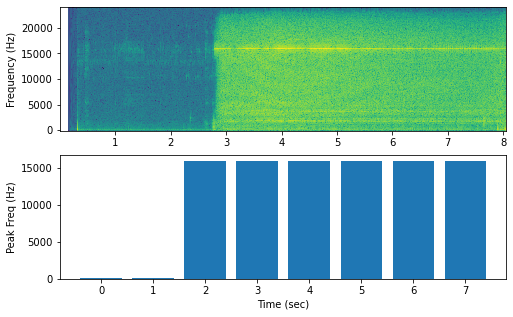

In [26]:
# analyze each sec of audio clip
nsec = int(np.floor(la))
pf = np.empty(nsec)
for i in range(nsec):
    audio = a[i*s:(i+1)*s]; na=len(audio) # use 48000 points with 48kHz
    a_k = np.fft.fft(audio)[0:int(na/2)]/na
    a_k[1:] = 2*a_k[1:]
    Pxx = np.abs(a_k)
    f = s*np.arange((na/2))/na
    ipf = np.argmax(Pxx)
    pf[i] = f[ipf]

plt.figure(figsize=(8,5))
plt.subplot(2,1,1)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.subplot(2,1,2)
tb = np.arange(0,nsec)
plt.bar(tb,pf)
plt.xlabel('Time (sec)'); plt.ylabel('Peak Freq (Hz)')
plt.show()